In [255]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import auc

# Common imports
import os
import numpy as np
import xarray as xr

import xskillscore as xs        # calculating skill scores
#import xesmf as xe              # regridding
%matplotlib inline

import cartopy
import cartopy as ccrs

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rcParams["figure.figsize"] = (16,8)
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
path='/media/saranya/DAEA17D6EA17ADAF/Data/Data_Aaditya/jupyter'
nc_igpp=xr.open_dataset(path+'/ockhi_gpp_data/igpp_ERA5_2017.nc')
nc_kgpp=xr.open_dataset(path+'/ockhi_gpp_data/kotal_final_ERA5_2017.nc')
nc_icig=xr.open_dataset(path+'/ockhi_gpp_data/igpp_imd_2017_1129_ens.nc')
nc_ickg=xr.open_dataset(path+'/ockhi_gpp_data/kotal_index_2017_1129_ens.nc')

/home/saranya/anaconda3/lib/python3.9/site-packages/xarray/coding/times.py:144: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [3]:
tc_igpp=nc_igpp.kot[333:344,91:116,56:101]
tc_kgpp=nc_kgpp.kot[333:344,91:116,56:101]
ic_kot=nc_ickg.kot*100000
igpp_nearic=(nc_icig.kot[0:11,91:116,56:101])
kgpp_nearic=(ic_kot[0:11,91:116,56:101])

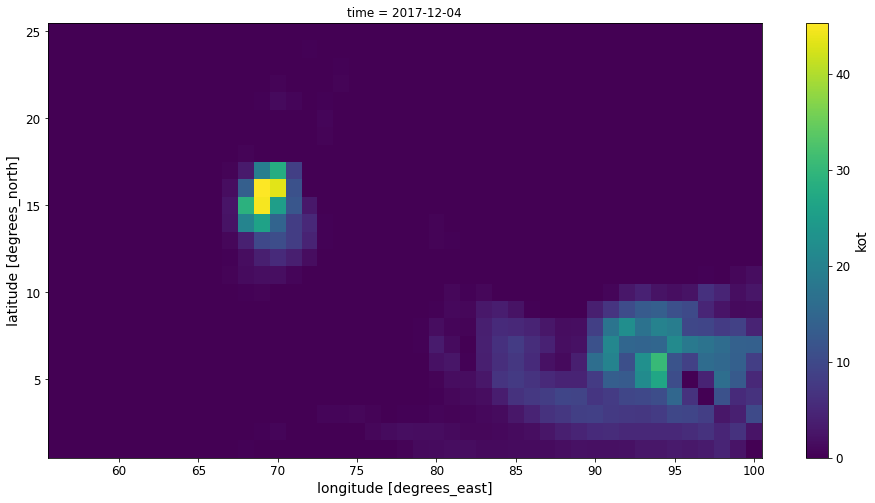

In [5]:
tc_igpp[4,:,:].plot()

In [291]:
thrsh=np.arange(0,100,1)

In [292]:
thrsh.shape

(100,)

In [293]:
ig_t=[]
kg_t=[]
ig_p=[]
kg_p=[]

for i, t in enumerate(thrsh):
    print(t)
    igpp_truth=tc_igpp.where(tc_igpp==0, other=1).where(tc_igpp>=t, other=0)
    igpp_y=igpp_truth.values.flatten('F')
    ig_t.append(igpp_y)
    kgpp_truth=tc_kgpp.where(tc_kgpp==0, other=1).where(tc_kgpp>=t, other=0)
    kgpp_y=kgpp_truth.values.flatten('F')
    kg_t.append(kgpp_y)
    igpp_pred=igpp_nearic.where(igpp_nearic==0, other=1).where(igpp_nearic>=t, other=0)
    igpp_yp=igpp_pred.values.flatten('F')
    ig_p.append(igpp_yp)
    kgpp_pred=kgpp_nearic.where(kgpp_nearic==0, other=1).where(kgpp_nearic>=t, other=0)
    kgpp_yp=kgpp_pred.values.flatten('F')
    kg_p.append(kgpp_yp)
    



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [294]:
ig_p

[array([1., 1., 1., ..., 1., 1., 1.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0.,

In [295]:
ig_tr=np.array(ig_t)
kg_tr=np.array(kg_t)
ig_pr=np.array(ig_p)
kg_pr=np.array(kg_p)

In [296]:
ig_tr.shape

(100, 12375)

In [297]:
icm1=[]
TPR_ig=[]
FPR_ig=[]
for i,j in zip(ig_tr, ig_pr):
    print(i,j)
    cm1 = confusion_matrix(i, j)
    icm1.append(cm1)
    TP1, FN1, FP1, TN1 = confusion_matrix(i,j,labels=[1,0]).reshape(-1)
    TPR1=(TP1/(TP1+FN1))
    TPR_ig.append(TPR1)
    FPR1=(FP1/(TN1+FP1))
    FPR_ig.append(FPR1)

[0. 0. 0. ... 1. 1. 1.] [1. 1. 1. ... 1. 1. 1.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0.

/tmp/ipykernel_2888885/2014855668.py:9: RuntimeWarning: invalid value encountered in long_scalars
  TPR1=(TP1/(TP1+FN1))
/tmp/ipykernel_2888885/2014855668.py:9: RuntimeWarning: invalid value encountered in long_scalars
  TPR1=(TP1/(TP1+FN1))
/tmp/ipykernel_2888885/2014855668.py:9: RuntimeWarning: invalid value encountered in long_scalars
  TPR1=(TP1/(TP1+FN1))
/tmp/ipykernel_2888885/2014855668.py:9: RuntimeWarning: invalid value encountered in long_scalars
  TPR1=(TP1/(TP1+FN1))
/tmp/ipykernel_2888885/2014855668.py:9: RuntimeWarning: invalid value encountered in long_scalars
  TPR1=(TP1/(TP1+FN1))
/tmp/ipykernel_2888885/2014855668.py:9: RuntimeWarning: invalid value encountered in long_scalars
  TPR1=(TP1/(TP1+FN1))


In [298]:
icm=[]
TPR_kg=[]
FPR_kg=[]
for l,m in zip(kg_tr, kg_pr):
    print(l,m)
    cm2 = confusion_matrix(l, m)
    icm.append(cm2)
    TP2, FN2, FP2, TN2 = confusion_matrix(l,m,labels=[1,0]).reshape(-1)
    TPR2=(TP2/(TP2+FN2))
    TPR_kg.append(TPR2)
    FPR2=(FP2/(TN2+FP2))
    FPR_kg.append(FPR2)
    

[0. 0. 0. ... 1. 1. 1.] [1. 1. 1. ... 1. 1. 1.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0.

In [299]:
FPR_ig

[0.5372137404580153,
 0.20301176470588236,
 0.14641182834475297,
 0.1086535072259429,
 0.08596537022535457,
 0.07176703713276471,
 0.0608004104669061,
 0.0481120067882902,
 0.03869173059091292,
 0.03245283018867925,
 0.026238823431102197,
 0.020923641213737913,
 0.017873472441599467,
 0.01533360961458765,
 0.012318121693121693,
 0.01031182973106748,
 0.009132044426162073,
 0.007553366174055829,
 0.006231040419775354,
 0.0055682934818211596,
 0.0050711598233273356,
 0.004575911096584409,
 0.003918047506326014,
 0.003668378576669112,
 0.00350276963180189,
 0.003093958638658199,
 0.0030103327638109187,
 0.002683581361307636,
 0.0023577235772357726,
 0.002113305697797285,
 0.0020316944331572532,
 0.0017053759948026637,
 0.0017045454545454545,
 0.0016228497241155468,
 0.0013790865579621967,
 0.0012978585334198572,
 0.0012165450121654502,
 0.0009727626459143969,
 0.0008915545469281893,
 0.0006482456851146585,
 0.0006481406465202949,
 0.0005671230657052581,
 0.0006479831524380366,
 0.00064787

In [300]:
FPR_kg

[0.5370016963528413,
 0.20386527816868374,
 0.14873814211562555,
 0.1135685448481657,
 0.09518041014104006,
 0.08112271093616293,
 0.06943031536113937,
 0.06036877999494822,
 0.05089143718088223,
 0.044761190297574395,
 0.03915211970074813,
 0.0336015929644072,
 0.02963330850095191,
 0.025943980831198876,
 0.02268789703819817,
 0.020107128141738772,
 0.017525094619055454,
 0.015604467805519055,
 0.013376005251928443,
 0.012207111256758971,
 0.011050175984284195,
 0.00989613151222704,
 0.009151074434185799,
 0.008571428571428572,
 0.008080313418217433,
 0.007665959876039798,
 0.00684931506849315,
 0.006440042390152442,
 0.005866058334691217,
 0.005620723362658847,
 0.00537371763556424,
 0.0050463942699007,
 0.004556920823500692,
 0.004393458628264584,
 0.0042293615290768605,
 0.003902756321652167,
 0.0037392293935945373,
 0.003169443315725315,
 0.0030066634162197303,
 0.0030061748456288594,
 0.00276130918541379,
 0.0025168466347324837,
 0.002354469432491678,
 0.0022725428130833535,
 0.0

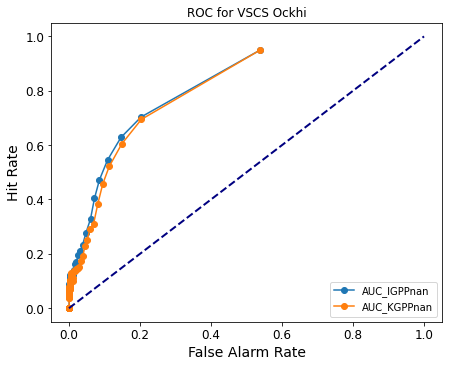

In [311]:
#plt.plot(FPR_ig,TPR_ig)
#plt.plot(FPR_kg,TPR_kg)


fig = plt.figure()
plt.rcParams["figure.figsize"] = (6,5.5)

plt.plot(FPR_ig,TPR_ig,'o-',label="AUC_IGPP"+str(auc1))

plt.plot(FPR_kg,TPR_kg,'o-',label="AUC_KGPP"+str(auc1))
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.ylabel('Hit Rate')
plt.xlabel('False Alarm Rate')
plt.title('ROC for VSCS Ockhi')
plt.legend(loc=4)
plt.show()
fig.savefig('ROC.jpg')


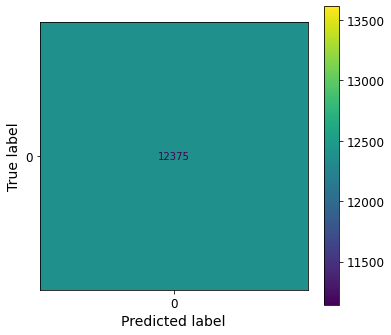

In [312]:
cm_display = ConfusionMatrixDisplay(cm1).plot()